# Improving Computer Vision Accuracy using Convolutions
* Deep Neural Network without Convolutions
* Convolutional Neural Network
* Dataset: Fashion MNIST

## Deep Neural Network

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
model.fit(training_images, training_labels, epochs=5, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 5s - loss: 0.7450 - accuracy: 0.7580
Epoch 2/5
60000/60000 - 4s - loss: 0.5178 - accuracy: 0.8238
Epoch 3/5
60000/60000 - 4s - loss: 0.4720 - accuracy: 0.8379
Epoch 4/5
60000/60000 - 2s - loss: 0.4466 - accuracy: 0.8450
Epoch 5/5
60000/60000 - 3s - loss: 0.4287 - accuracy: 0.8520


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
test_loss = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.3788 - accuracy: 0.8376


## Convolutional Neural Network

By stacking Convolution and Pooling layers in front of Dense layers, the higher accuracy can be achievable.   

![Simple CNN architecuture](img/simple-cnn-model.png)

In [8]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = tf.expand_dims(training_images, axis=3)
test_images = tf.expand_dims(test_images, axis=3)
print("Expanded training_images shape: ", training_images.shape)
print("Expanded test_images shape: ", training_images.shape)

# normalization
training_images = tf.dtypes.cast(training_images, tf.float32) / 255
test_images = tf.dtypes.cast(test_images, tf.float32) / 255

Expanded training_images shape:  (60000, 28, 28, 1)
Expanded test_images shape:  (60000, 28, 28, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [10]:
model.fit(training_images, training_labels, epochs=5, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 6s - loss: 0.4386 - accuracy: 0.8404
Epoch 2/5
60000/60000 - 5s - loss: 0.2929 - accuracy: 0.8916
Epoch 3/5
60000/60000 - 5s - loss: 0.2450 - accuracy: 0.9092
Epoch 4/5
60000/60000 - 4s - loss: 0.2108 - accuracy: 0.9223
Epoch 5/5
60000/60000 - 4s - loss: 0.1846 - accuracy: 0.9321


In [11]:
test_loss = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2580 - accuracy: 0.9105


## Visualizing the Convolutions and Pooling

0: conv2d/Identity:0
1: max_pooling2d/Identity:0
2: conv2d_1/Identity:0
3: max_pooling2d_1/Identity:0
4: flatten_1/Identity:0
5: dense_2/Identity:0
6: dense_3/Identity:0


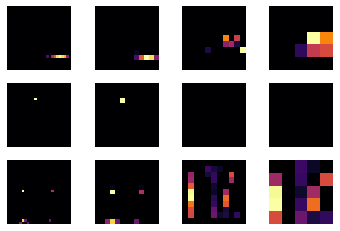

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axarr = plt.subplots(3, 4)

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 28

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]

for i, layer_output in enumerate(layer_outputs):
    print("{}: {}".format(i, layer_output.name))

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(4):
    f1 = activation_model.predict(tf.reshape(test_images[FIRST_IMAGE], (1, 28, 28, 1)))[x]
    axarr[0, x].axis('off')
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    f2 = activation_model.predict(tf.reshape(test_images[SECOND_IMAGE], (1, 28, 28, 1)))[x]
    axarr[1, x].axis('off')
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    f3 = activation_model.predict(tf.reshape(test_images[THIRD_IMAGE], (1, 28, 28, 1)))[x]
    axarr[2, x].axis('off')
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')

## Further Tuning
In this example, we adopt a simple archtecture but increase the training iterations and we can achive the higher accuracy (~ 98.6% for test images) 

In [13]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images/255.0
test_images=test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, verbose=2)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 4s - loss: 0.1442 - accuracy: 0.9571
Epoch 2/10
60000/60000 - 4s - loss: 0.0488 - accuracy: 0.9847
Epoch 3/10
60000/60000 - 4s - loss: 0.0318 - accuracy: 0.9900
Epoch 4/10
60000/60000 - 3s - loss: 0.0197 - accuracy: 0.9935
Epoch 5/10
60000/60000 - 4s - loss: 0.0142 - accuracy: 0.9955
Epoch 6/10
60000/60000 - 4s - loss: 0.0103 - accuracy: 0.9967
Epoch 7/10
60000/60000 - 4s - loss: 0.0069 - accuracy: 0.9978
Epoch 8/10
60000/60000 - 5s - loss: 0.0066 - accuracy: 0.9979
Epoch 9/10
60000/60000 - 6s - loss: 0.0050 - accuracy: 0.9985
Epoch 10/10
60000/60000 - 5s - loss: 0.0042 - accuracy: 0.9985
10000/1 - 0s - loss: 0.0267 - accuracy: 0.9870
